In [1]:
from standardInclude import *

Not a jupyter notebook. Not enabling notebook functions.
Welcome to JupyROOT 6.22/00
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [2]:
path = "./data/Run_2E/"
dataset = "Run 2-E"
csv_files = [x for x in os.listdir(path) if "csv" in x]
names = [x.split("_")[len(x.split("_")) -1].split(".csv")[0] for x in csv_files]
print(csv_files)
print(names)
counter = 0

['dqc_run2E_ctags.csv', 'dqc_run2E_losses.csv', 'dqc_run2E_fillcuts.csv']
['ctags', 'losses', 'fillcuts']


In [3]:
dfs = {}
dfs_cut = {}
for i, file in enumerate(csv_files):
    dfi = pandas.read_csv(path+file, header=None)
    dfs[names[i]] = dfi
    print(names[i])
    print(dfi.head())
    print("***************")

ctags
       0  1  2    3  4
0  26459  0  0  0.0  0
1  26460  0  0  0.0  0
2  26460  1  0  0.0  0
3  26460  2  0  0.0  0
4  26460  3  0  0.0  0
***************
losses
       0  1    2
0  26459  0  0.0
1  26460  0  0.0
2  26460  1  0.0
3  26460  2  0.0
4  26460  3  0.0
***************
fillcuts
       0  1  2    3
0  26459  0  0    0
1  26460  0  0  141
2  26460  1  0   67
3  26460  2  0  101
4  26460  3  0  124
***************


ctags/t0Val >=  0.0034  and fills >  25  and ctags >  5000  and t0val >  4000000.0


/home/jlab/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/jlab/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


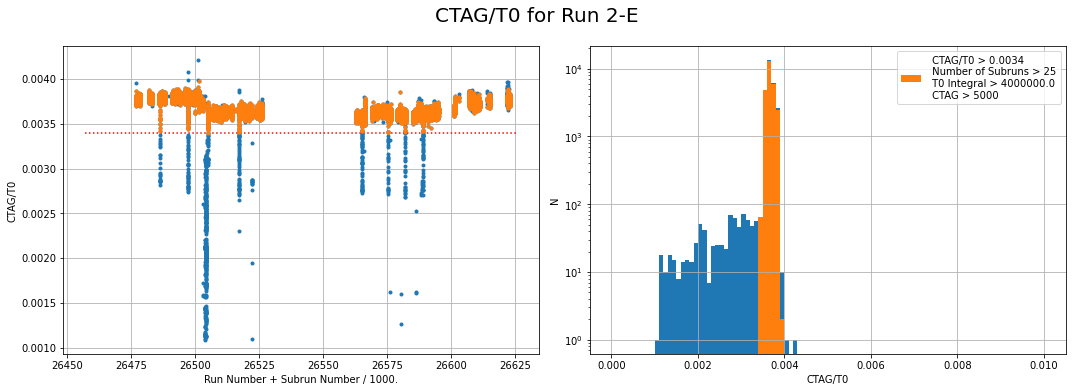

/home/jlab/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/jlab/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


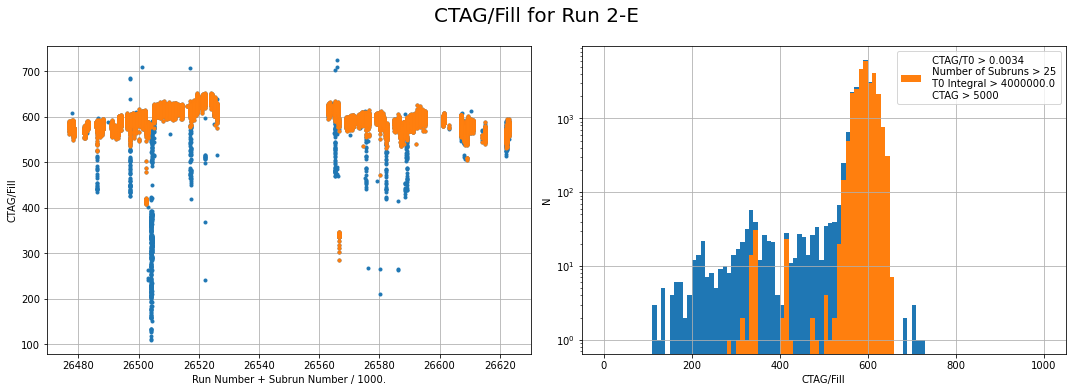

In [4]:
df = dfs['ctags']

ctagPerFillCut = 0.0034
nSubuncut = 25
t0_int_cut = 4e6
ctag_total_cut = 5000

print("ctags/t0Val >= ", ctagPerFillCut," and fills > ", nSubuncut," and ctags > ", ctag_total_cut," and t0val > ", t0_int_cut)

df_cut = df.loc[df[2]/df[3] > ctagPerFillCut].loc[df[4] > nSubuncut].loc[df[2] > ctag_total_cut].loc[df[3] > t0_int_cut]
dfs_cut['ctags'] = df_cut

#  run  | subrun | ctags |    t0val    | fills  
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(df[0]+df[1]/1000., df[2]/df[3], ".")
ax[0].plot([np.min(df[0])-2, np.max(df[0])+2], [ctagPerFillCut, ctagPerFillCut], ":", color='red')
ax[1].hist(df[2]/df[3],bins=100,range=(0,0.01))
ax[0].plot(df_cut[0]+df_cut[1]/1000., df_cut[2]/df_cut[3], ".")
ax[1].hist(df_cut[2]/df_cut[3],bins=100,range=(0,0.01),label=(" CTAG/T0 > "+str(ctagPerFillCut)+
                                                              "\n Number of Subruns > "+str(nSubuncut)+
                                                              "\n T0 Integral > "+str(t0_int_cut)+
                                                              "\n CTAG > "+str(ctag_total_cut)))
ax[1].legend()
ax[1].set_yscale("log")
plt.suptitle("CTAG/T0 for "+dataset, y=1.08, fontsize=20)
ax[0].set_ylabel("CTAG/T0")
ax[0].set_xlabel("Run Number + Subrun Number / 1000.")
ax[1].set_xlabel("CTAG/T0")
ax[1].set_ylabel("N")
plt.tight_layout()
for axi in ax:
    axi.grid()
plt.savefig("./images/DQC_Images_"+dataset+"_CTAG_over_T0.png", bbox_inches='tight')

plt.show()

fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(df[0]+df[1]/1000., df[2]/df[4], ".")
ax[1].hist(df[2]/df[4],bins=100,range=(0,1000))
ax[0].plot(df_cut[0]+df_cut[1]/1000., df_cut[2]/df_cut[4], ".")
ax[1].hist(df_cut[2]/df_cut[4],bins=100,range=(0,1000),label=(" CTAG/T0 > "+str(ctagPerFillCut)+
                                                              "\n Number of Subruns > "+str(nSubuncut)+
                                                              "\n T0 Integral > "+str(t0_int_cut)+
                                                              "\n CTAG > "+str(ctag_total_cut)))
ax[1].legend()
ax[1].set_yscale("log")
plt.suptitle("CTAG/Fill for "+dataset, y=1.08, fontsize=20)
ax[0].set_ylabel("CTAG/Fill")
ax[0].set_xlabel("Run Number + Subrun Number / 1000.")
ax[1].set_xlabel("CTAG/Fill")
ax[1].set_ylabel("N")
plt.tight_layout()
for axi in ax:
    axi.grid()
plt.savefig("./images/DQC_Images_"+dataset+"_Ctag_per_fill.png", bbox_inches='tight')

plt.show()

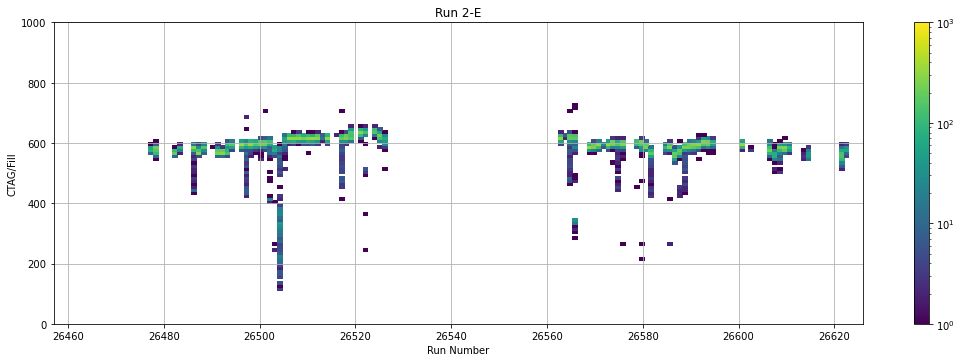

In [5]:
fig, ax = plt.subplots(figsize=(15,5))
runstart = np.min(df[0])-2
runend = np.max(df[0])+2
plt.hist2d(df[0], df[2]/df[4], range=((runstart, runend), (0,1000)),bins=((runend-runstart+1),100),
          norm = matplotlib.colors.LogNorm(vmin=1, vmax=1000))
#plt.xlim(25920, 25930)

plt.colorbar()
ax.set_xlabel("Run Number")
ax.set_ylabel("CTAG/Fill")
plt.tight_layout()
plt.grid()
plt.title(dataset)
plt.savefig("./images/DQC_Images_"+dataset+"_Ctag_per_fill_hist.png", bbox_inches='tight')

plt.show()

fillFraction >= -0.1


/home/jlab/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/jlab/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


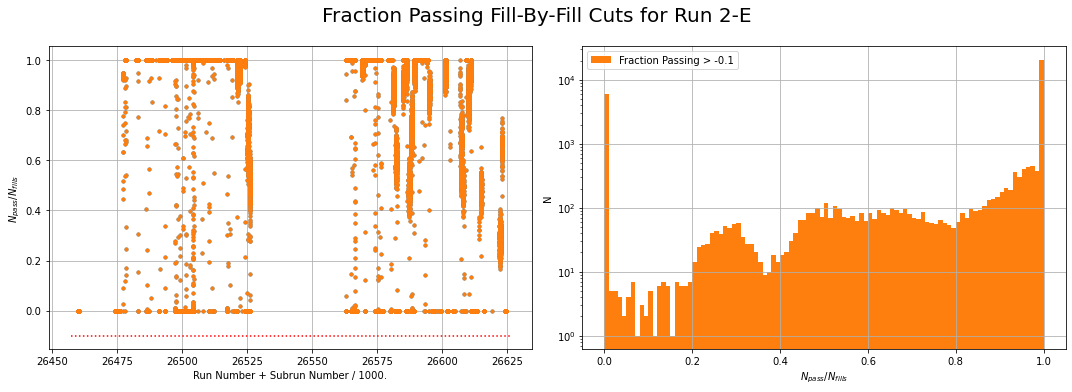

In [6]:
df = dfs['fillcuts']

fraction_passing = -0.1

print("fillFraction >=", fraction_passing)

df_cut = df.loc[df[2]/df[3] > fraction_passing]
dfs_cut['fillcuts'] = df_cut

#    run  | subrun | fills | fills   
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(df[0]+df[1]/1000., df[2]/df[3], ".")
ax[0].plot([np.min(df[0])-2, np.max(df[0])+2], [fraction_passing, fraction_passing], ":", color='red')

ax[1].hist(df[2]/df[3],bins=100,range=(0,1))

ax[0].plot(df_cut[0]+df_cut[1]/1000., df_cut[2]/df_cut[3], ".")
ax[1].hist(df_cut[2]/df_cut[3],bins=100,range=(0,1),label=("Fraction Passing > "+str(fraction_passing)))
ax[1].legend()

ax[1].set_yscale("log")
plt.suptitle("Fraction Passing Fill-By-Fill Cuts for "+dataset, y=1.08, fontsize=20)
ax[0].set_ylabel(r"$N_{pass}/N_{fills}$")
ax[0].set_xlabel("Run Number + Subrun Number / 1000.")
ax[1].set_xlabel(r"$N_{pass}/N_{fills}$")
ax[1].set_ylabel("N")
plt.tight_layout()
for axi in ax:
    axi.grid()
plt.savefig("./images/DQC_Images_"+dataset+"_FractionPassingCuts.png", bbox_inches='tight')


# ax[0].set_xlim(26050,26061)
plt.show()

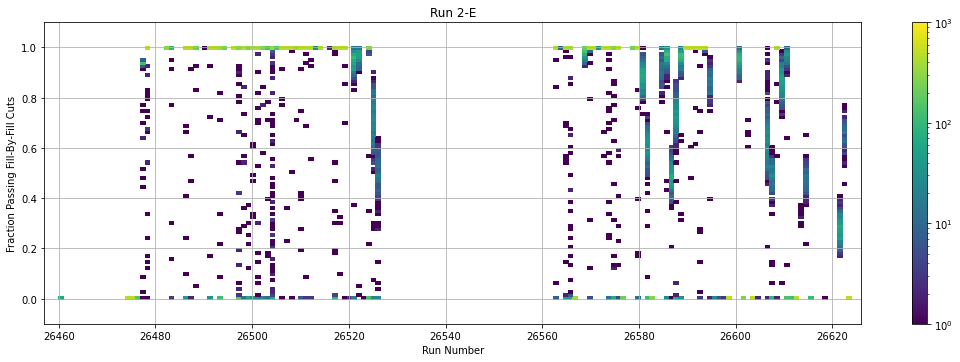

In [7]:
fig, ax = plt.subplots(figsize=(15,5))
runstart = np.min(df[0])-2
runend = np.max(df[0])+2
plt.hist2d(df[0], df[2]/df[3], range=((runstart, runend), (-0.1,1.1)),bins=((runend-runstart+1),100),
          norm = matplotlib.colors.LogNorm(vmin=1, vmax=1000))
#plt.xlim(25920, 25930)

plt.colorbar()
ax.set_xlabel("Run Number")
ax.set_ylabel("Fraction Passing Fill-By-Fill Cuts")
plt.tight_layout()
plt.grid()
plt.title(dataset)
plt.savefig("./images/DQC_Images_"+dataset+"_FractionPassingCuts_hist.png", bbox_inches='tight')

plt.show()

lossRatio <=  0.008


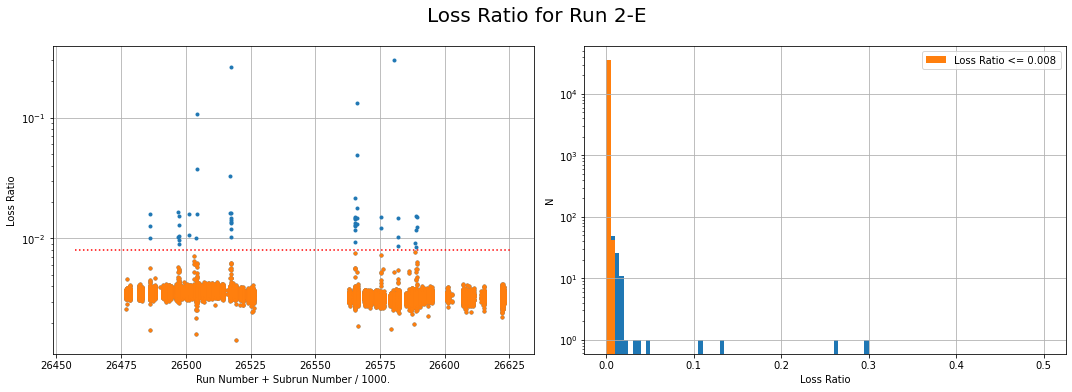

In [8]:
df = dfs['losses']

loss_ratio = 0.008

print("lossRatio <= ",loss_ratio)

df_cut = df.loc[df[2] <= loss_ratio]
dfs_cut['losses'] = df_cut

#      run  | subrun | lossratio  
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(df[0]+df[1]/1000., df[2], ".")
ax[0].plot(df_cut[0]+df_cut[1]/1000., df_cut[2], ".")
ax[0].plot([np.min(df[0])-2, np.max(df[0])+2], [loss_ratio, loss_ratio], ":", color='red')

ax[0].set_yscale("log")
ax[1].hist(df[2],bins=100,range=(0,.5))
ax[1].hist(df_cut[2],bins=100,range=(0,.5),label=("Loss Ratio <= "+str(loss_ratio)))
ax[1].legend()
ax[1].set_yscale("log")
plt.suptitle("Loss Ratio for "+dataset, y=1.08, fontsize=20)
ax[0].set_ylabel("Loss Ratio")
ax[0].set_xlabel("Run Number + Subrun Number / 1000.")
ax[1].set_xlabel(r"Loss Ratio")
ax[1].set_ylabel("N")
plt.tight_layout()
for axi in ax:
    axi.grid()
plt.savefig("./images/DQC_Images_"+dataset+"_LossRatio.png", bbox_inches='tight')

plt.show()

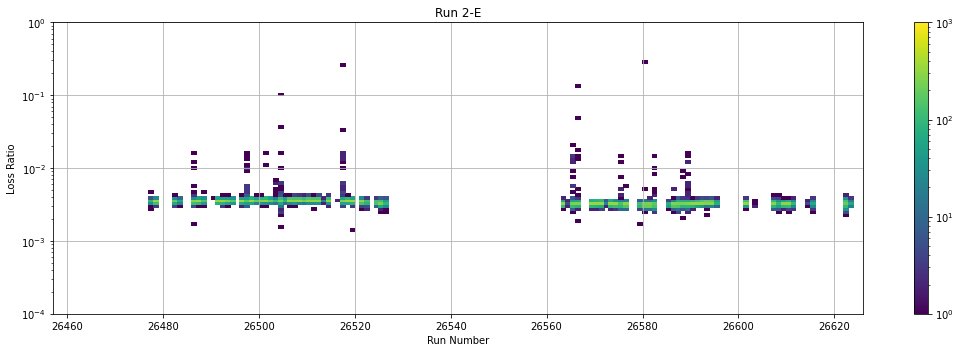

In [9]:
fig, ax = plt.subplots(figsize=(15,5))
runstart = np.min(df[0])-2
runend = np.max(df[0])+2

logbins = [ np.linspace(runstart, runend, runend-runstart+1), 
            np.logspace(-4,0,100)
          ]

plt.hist2d(df[0], df[2], bins=logbins,
          norm = matplotlib.colors.LogNorm(vmin=1, vmax=1000))
#plt.xlim(25970, 25980)

plt.colorbar()
plt.yscale("log")
ax.set_xlabel("Run Number")
ax.set_ylabel("Loss Ratio")
plt.title(dataset)
plt.tight_layout()
plt.grid()
plt.savefig("./images/DQC_Images_"+dataset+"_LossRatio_hist.png", bbox_inches='tight')

plt.show()

---

# Now load global cut information

### Begin with quad cuts

In [10]:
df_quad_bad = pandas.read_csv("./data/Run2_global/quad_cut_run2.txt", header=None, delimiter=" ")
df_quad_bad = df_quad_bad.loc[df_quad_bad[0] > runstart].loc[df_quad_bad[0] < runend]
df_quad_bad.head()

,0,1
31632,26458,3
31633,26458,4
31634,26458,284
31635,26458,285
31636,26458,286


### This dataframe is all of the *bad* cuts, so we need to invert it to make the format compatable with the rest

In [11]:
print(runstart, runend)

26457 26626


In [12]:
ding = []
for run in range(runstart, runend+1, 1):
    for subrun in range(500):
        ding.append([run,subrun])
df_quad = pandas.DataFrame(ding)#, dtype=int)
df_quad.head()

,0,1
0,26457,0
1,26457,1
2,26457,2
3,26457,3
4,26457,4


In [13]:
# https://kanoki.org/2019/07/04/pandas-difference-between-two-dataframes/
df_quad = pandas.concat([df_quad,df_quad_bad]).drop_duplicates(keep=False)

In [14]:
dfs_cut['quad'] = df_quad

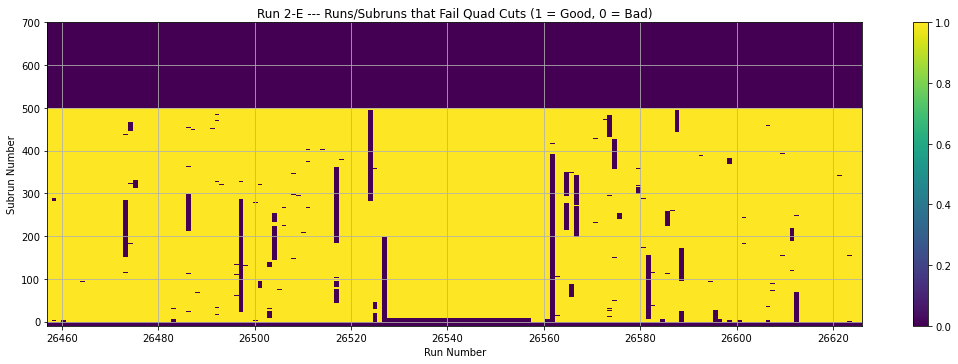

In [15]:
fig, ax = plt.subplots(figsize=(15,5))
plt.hist2d(df_quad[0], df_quad[1], range=((runstart, runend), (-10,700)),bins=((runend-runstart+1),710),
          #norm = matplotlib.colors.LogNorm(vmin=1, vmax=1000)
          )
#plt.xlim(25920, 25930)

plt.colorbar()
ax.set_xlabel("Run Number")
ax.set_ylabel("Subrun Number")
plt.tight_layout()
plt.grid()
plt.title(dataset+" --- Runs/Subruns that Fail Quad Cuts (1 = Good, 0 = Bad)")
plt.savefig("./images/DQC_Images_"+dataset+"QuadCut_hist.png", bbox_inches='tight')

plt.show()

---

### And now the field info

In [16]:
field_path = "/home/jlab/g-2/dqc/data/Run2_global/field/"
field_files = [ x for x in os.listdir(field_path) if "_DQC.csv" in x]
print(field_files)

['6630_6672_DQC.csv', '6882_6935_DQC.csv', '6780_6841_DQC.csv', '7255_7291_DQC.csv', '7152_7188_DQC.csv', '7677_7697_DQC.csv', '7844_7874_DQC.csv', '7190_7213_DQC.csv', '7034_7065_DQC.csv', '7124_7149_DQC.csv', '6845_6878_DQC.csv', '7217_7249_DQC.csv', '7082_7104_DQC.csv', '7520_7546_DQC.csv', '7479_7512_DQC.csv', '7434_7466_DQC.csv', '7610_7636_DQC.csv', '7394_7429_DQC.csv', '6944_6985_DQC.csv', '6992_7029_DQC.csv']


In [17]:
df_field = pandas.DataFrame()
for file in field_files:
    dfi= pandas.read_csv(field_path+file)
    #print(dfi.head())
    df_field = df_field.append(dfi, ignore_index=True)
    #break
df_field = df_field.loc[df_field['run'] > runstart].loc[df_field['run'] < runend]

dfs_cut['field'] = df_field.loc[df_field['field status'] ==  0]

In [18]:
df_field.head()

,run,subrun,field status
201211,26562,163,16
201212,26562,164,0
201213,26562,165,0
201214,26562,166,0
201215,26562,167,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4514cb0b10>]],
      dtype=object)

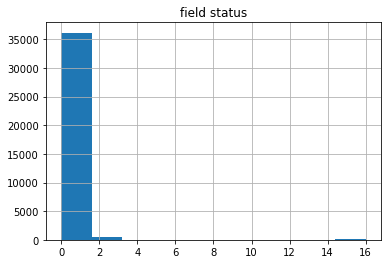

In [19]:
df_field.hist('field status')

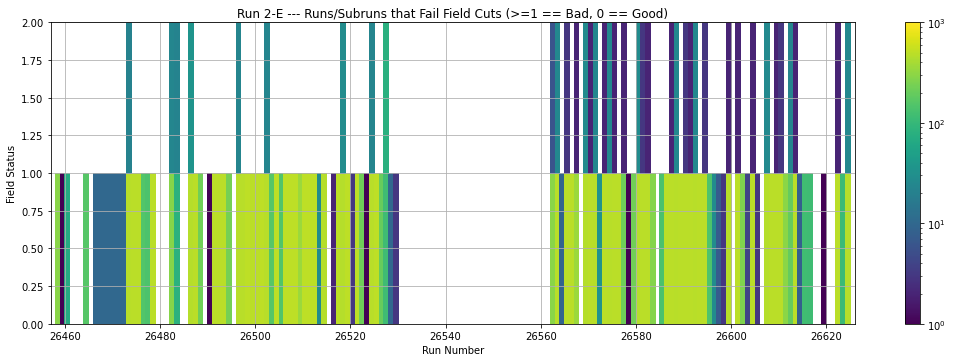

In [20]:
fig, ax = plt.subplots(figsize=(15,5))
plt.hist2d(df_field['run'], df_field['field status'], 
           #range=((runstart, runend), (-1,20)),bins=((runend-runstart),21),
           bins=[list(np.linspace(runstart,runend, runend-runstart+1)), [-1,0,1,10000] ],
           norm = matplotlib.colors.LogNorm(vmin=1, vmax=1000)
          )
#plt.xlim(25920, 25930)

plt.colorbar()
ax.set_xlabel("Run Number")
ax.set_ylabel("Field Status")
plt.tight_layout()
plt.grid()
plt.title(dataset+" --- Runs/Subruns that Fail Field Cuts (>=1 == Bad, 0 == Good)")
plt.savefig("./images/DQC_Images_"+dataset+"FieldCut_hist.png", bbox_inches='tight')
plt.ylim(0,2)

plt.show()

---

### And now to create a list of known systematic run ranges

In [21]:
known_systematic_runs = []

syst_file = "./data/systematic_runs_mark.txt"
with open(syst_file,"r") as f:
    for line in f:
#         print(line.split(","))
        ding = line.split(",")
        if("#" not in line[0]):
            known_systematic_runs.append([int(ding[0]), int(ding[1])])
print(known_systematic_runs)

[[24309, 24374], [24463, 24574], [25655, 25659], [25890, 25893], [25974, 25978], [26160, 26167], [26181, 26196], [26342, 26357], [26580, 26584], [26596, 26607], [26598, 26601], [26654, 26658], [26659, 26660], [26672, 26674], [26681, 26682], [26690, 26691], [26704, 26705], [26775, 26782], [27101, 27105], [27106, 27125], [27088, 27125], [27173, 27176], [27177, 27187], [27416, 27521], [27522, 27524], [27525, 27543]]


---

# And now lets combine all of the data into one dataframe

In [22]:
#lets use the pandas inner join method; https://datacarpentry.org/python-ecology-lesson/05-merging-data/
for i, name in enumerate(dfs_cut):
    dfi = dfs_cut[name]
    print(name)
    print(dfi.head())
    
    for col in dfi.columns:
        dfi[str(col)+"_"+name] = dfi[col]
    
    #create unique id column for each run/subrun
    try:
        dfi['unique id'] = dfi[0]*1000 + dfi[1]
    except:
        dfi['unique id'] = dfi['run']*1000 + dfi['subrun']
        
    #combine them together using an inner join on the unique id
    if(i == 0):
        df_merged = dfi
    else:
        df_merged = pandas.merge(left=df_merged, right=dfi, left_on='unique id', right_on='unique id', suffixes=("", name))


df_merged.head()

ctags
          0  1      2           3    4
1370  26477  0  50163  13409100.0   87
1371  26477  1  53648  14335200.0   93
1372  26477  2  59087  15681200.0  102
1373  26477  3  45072  12003800.0   78
1374  26477  4  22910   6025770.0   40
fillcuts
       0  1  2    3
1  26460  0  0  141
2  26460  1  0   67
3  26460  2  0  101
4  26460  3  0  124
5  26460  4  0  124
losses
       0  1    2
0  26459  0  0.0
1  26460  0  0.0
2  26460  1  0.0
3  26460  2  0.0
4  26460  3  0.0


/home/jlab/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jlab/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


quad
       0  1
0  26457  0
1  26457  1
2  26457  2
3  26457  3
4  26457  4
field
          run  subrun  field status
201212  26562     164             0
201213  26562     165             0
201214  26562     166             0
201215  26562     167             0
201216  26562     168             0


/home/jlab/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,0,1,2,3,4,0_ctags,1_ctags,2_ctags,3_ctags,4_ctags,...,0quad,1quad,0_quad,1_quad,run,subrun,field status,run_field,subrun_field,field status_field
0,26477,0,50163,13409100.0,87,26477,0,50163,13409100.0,87,...,26477,0,26477,0,26477,0,0,26477,0,0
1,26477,1,53648,14335200.0,93,26477,1,53648,14335200.0,93,...,26477,1,26477,1,26477,1,0,26477,1,0
2,26477,2,59087,15681200.0,102,26477,2,59087,15681200.0,102,...,26477,2,26477,2,26477,2,0,26477,2,0
3,26477,3,45072,12003800.0,78,26477,3,45072,12003800.0,78,...,26477,3,26477,3,26477,3,0,26477,3,0
4,26477,4,22910,6025770.0,40,26477,4,22910,6025770.0,40,...,26477,4,26477,4,26477,4,0,26477,4,0


In [23]:
df_merged.columns

Index([                 '0',                  '1',                  '2',
                        '3',                    4,            '0_ctags',
                  '1_ctags',            '2_ctags',            '3_ctags',
                  '4_ctags',          'unique id',          '0fillcuts',
                '1fillcuts',          '2fillcuts',          '3fillcuts',
               '0_fillcuts',         '1_fillcuts',         '2_fillcuts',
               '3_fillcuts',                  '0',                  '1',
                          2,           '0_losses',           '1_losses',
                 '2_losses',              '0quad',              '1quad',
                   '0_quad',             '1_quad',                'run',
                   'subrun',       'field status',          'run_field',
             'subrun_field', 'field status_field'],
      dtype='object')

---

# And now create versions of the above plots which pass all of the cuts

/home/jlab/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/jlab/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


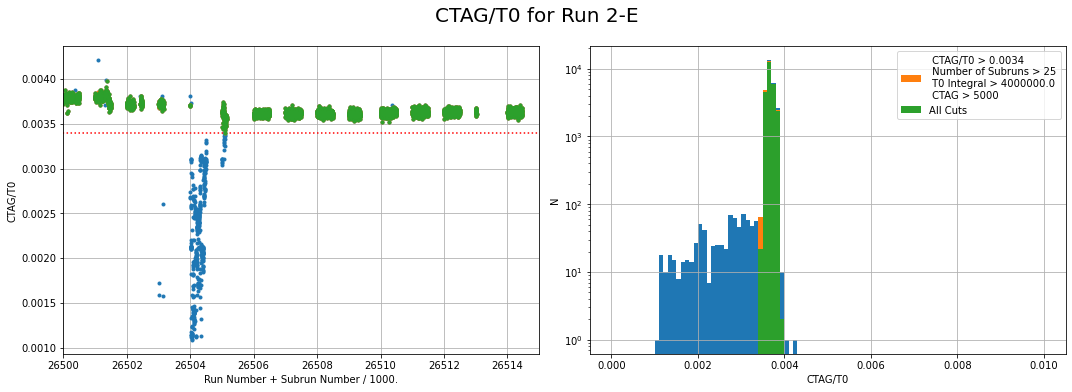

In [41]:
name = 'ctags'
df = dfs[name]
df_cut = dfs_cut[name]

#  run  | subrun | ctags |    t0val    | fills  
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(df[0]+df[1]/1000., df[2]/df[3], ".")
ax[0].plot([np.min(df[0])-2, np.max(df[0])+2], [ctagPerFillCut, ctagPerFillCut], ":", color='red')
ax[0].plot(df_cut[0]+df_cut[1]/1000., df_cut[2]/df_cut[3], ".")
ax[0].plot(df_merged["0"+"_"+name]+df_merged["1"+"_"+name]/1000., df_merged["2_"+name]/df_merged["3"+"_"+name], ".")

rect_patches = []
for i, (runstart, runend) in enumerate(known_systematic_runs):
    rect_patches.append( matplotlib.patches.Rectangle((runstart,0), runend-runstart+1, 1000, color='red', alpha=0.2) )
    ax[0].add_artist(rect_patches[i])


ax[1].hist(df[2]/df[3],bins=100,range=(0,0.01))
ax[1].hist(df_cut[2]/df_cut[3],bins=100,range=(0,0.01),label=(" CTAG/T0 > "+str(ctagPerFillCut)+
                                                              "\n Number of Subruns > "+str(nSubuncut)+
                                                              "\n T0 Integral > "+str(t0_int_cut)+
                                                              "\n CTAG > "+str(ctag_total_cut)))
ax[1].hist(df_merged["2_"+name]/df_merged["3_"+name],bins=100,range=(0,0.01),label=("All Cuts"))

ax[1].legend()
ax[1].set_yscale("log")
plt.suptitle("CTAG/T0 for "+dataset, y=1.08, fontsize=20)
ax[0].set_ylabel("CTAG/T0")
ax[0].set_xlabel("Run Number + Subrun Number / 1000.")
ax[1].set_xlabel("CTAG/T0")
ax[1].set_ylabel("N")
plt.tight_layout()
for axi in ax:
    axi.grid()
plt.savefig("./images/DQC_Images_"+dataset+"_CTAG_over_T0_allCuts.png", bbox_inches='tight')

# ax[0].set_xlim(26500, 26525)
ax[0].set_xlim(26500, 26515)
# ax[0].set_ylim(0.0034,0.0036)

plt.show()

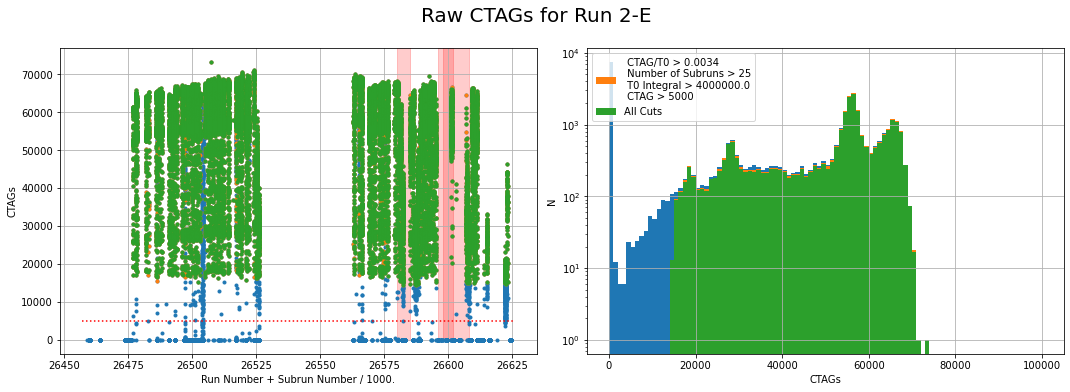

In [25]:
name = 'ctags'
df = dfs[name]
df_cut = dfs_cut[name]

#  run  | subrun | ctags |    t0val    | fills  
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(df[0]+df[1]/1000., df[2], ".")
ax[0].plot([np.min(df[0])-2, np.max(df[0])+2], [ctag_total_cut, ctag_total_cut], ":", color='red')
ax[0].plot(df_cut[0]+df_cut[1]/1000., df_cut[2], ".")
ax[0].plot(df_merged["0"+"_"+name]+df_merged["1"+"_"+name]/1000., df_merged["2_"+name], ".")

rect_patches = []
for i, (runstart, runend) in enumerate(known_systematic_runs):
    rect_patches.append( matplotlib.patches.Rectangle((runstart,0), runend-runstart+1, 100000000000, color='red', alpha=0.2) )
    ax[0].add_artist(rect_patches[i])

ax[1].hist(df[2],bins=100,range=(0,100000))
ax[1].hist(df_cut[2],bins=100,range=(0,100000),label=(" CTAG/T0 > "+str(ctagPerFillCut)+
                                                              "\n Number of Subruns > "+str(nSubuncut)+
                                                              "\n T0 Integral > "+str(t0_int_cut)+
                                                              "\n CTAG > "+str(ctag_total_cut)))
ax[1].hist(df_merged["2_"+name],bins=100,range=(0,100000),label=("All Cuts"))

ax[1].legend()
ax[1].set_yscale("log")
plt.suptitle("Raw CTAGs for "+dataset, y=1.08, fontsize=20)
ax[0].set_ylabel("CTAGs")
ax[0].set_xlabel("Run Number + Subrun Number / 1000.")
ax[1].set_xlabel("CTAGs")
ax[1].set_ylabel("N")
plt.tight_layout()
for axi in ax:
    axi.grid()
plt.savefig("./images/DQC_Images_"+dataset+"_CTAG_Raw_allCuts.png", bbox_inches='tight')

#ax[0].set_xlim(26357, 26361)

plt.show()

/home/jlab/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/jlab/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


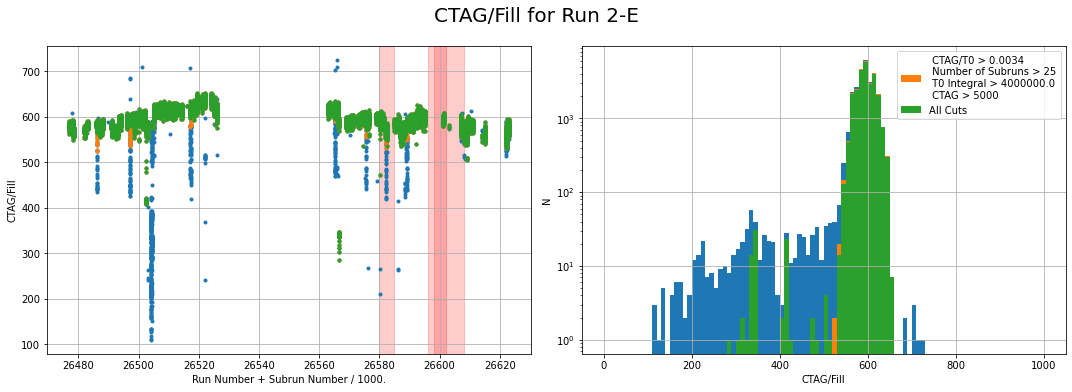

In [26]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(df[0]+df[1]/1000., df[2]/df[4], ".")
ax[1].hist(df[2]/df[4],bins=100,range=(0,1000))
ax[0].plot(df_cut[0]+df_cut[1]/1000., df_cut[2]/df_cut[4], ".")
ax[1].hist(df_cut[2]/df_cut[4],bins=100,range=(0,1000),label=(" CTAG/T0 > "+str(ctagPerFillCut)+
                                                              "\n Number of Subruns > "+str(nSubuncut)+
                                                              "\n T0 Integral > "+str(t0_int_cut)+
                                                              "\n CTAG > "+str(ctag_total_cut)))
ax[0].plot(df_merged["0_"+name]+df_merged["1_"+name]/1000., df_merged["2_"+name]/df_merged["4_"+name], ".")

rect_patches = []
for i, (runstart, runend) in enumerate(known_systematic_runs):
    rect_patches.append( matplotlib.patches.Rectangle((runstart,0), runend-runstart+1, 1000, color='red', alpha=0.2) )
    ax[0].add_artist(rect_patches[i])


ax[1].hist(df_merged["2_"+name]/df_merged["4_"+name],bins=100,range=(0,1000),label=("All Cuts"))

ax[1].legend()
ax[1].set_yscale("log")
plt.suptitle("CTAG/Fill for "+dataset, y=1.08, fontsize=20)
ax[0].set_ylabel("CTAG/Fill")
ax[0].set_xlabel("Run Number + Subrun Number / 1000.")
ax[1].set_xlabel("CTAG/Fill")
ax[1].set_ylabel("N")
plt.tight_layout()
for axi in ax:
    axi.grid()
plt.savefig("./images/DQC_Images_"+dataset+"_Ctag_per_fill_allCuts.png", bbox_inches='tight')

#ax[0].set_xlim(26150,26170)

plt.show()

/home/jlab/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/jlab/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


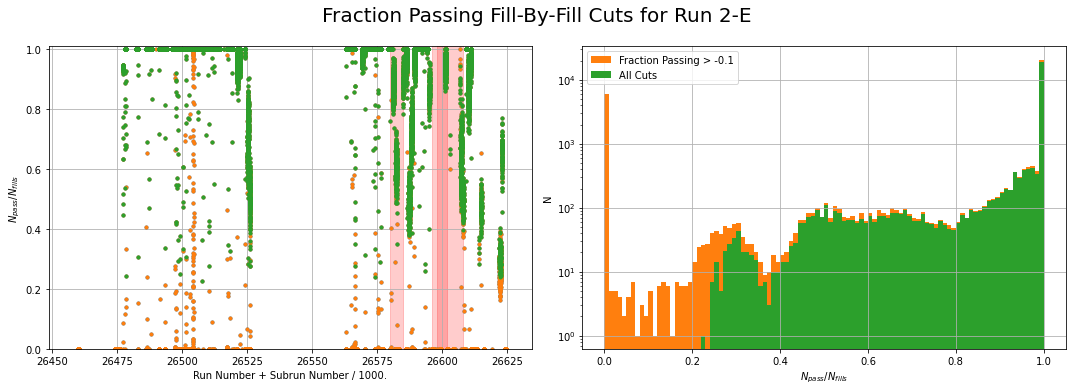

In [35]:
name = 'fillcuts'
df = dfs[name]
df_cut = dfs_cut[name]

#    run  | subrun | fills | fills   
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(df[0]+df[1]/1000., df[2]/df[3], ".")
ax[0].plot([np.min(df[0])-2, np.max(df[0])+2], [fraction_passing, fraction_passing], ":", color='red')

ax[1].hist(df[2]/df[3],bins=100,range=(0,1))

ax[0].plot(df_cut[0]+df_cut[1]/1000., df_cut[2]/df_cut[3], ".")


rect_patches = []
for i, (runstart, runend) in enumerate(known_systematic_runs):
    rect_patches.append( matplotlib.patches.Rectangle((runstart,0), runend-runstart+1, 1000, color='red', alpha=0.2) )
    ax[0].add_artist(rect_patches[i])


ax[1].hist(df_cut[2]/df_cut[3],bins=100,range=(0,1),label=("Fraction Passing > "+str(fraction_passing)))

ax[0].plot(df_merged["0_"+name]+df_merged["1_"+name]/1000., df_merged["2_"+name]/df_merged["3_"+name], ".")
ax[1].hist(df_merged["2_"+name]/df_merged["3_"+name],bins=100,range=(0,1),label=("All Cuts"))

ax[1].legend()

ax[1].set_yscale("log")
plt.suptitle("Fraction Passing Fill-By-Fill Cuts for "+dataset, y=1.08, fontsize=20)
ax[0].set_ylabel(r"$N_{pass}/N_{fills}$")
ax[0].set_xlabel("Run Number + Subrun Number / 1000.")
ax[1].set_xlabel(r"$N_{pass}/N_{fills}$")
ax[1].set_ylabel("N")
plt.tight_layout()
for axi in ax:
    axi.grid()
plt.savefig("./images/DQC_Images_"+dataset+"_FractionPassingCuts_allCuts.png", bbox_inches='tight')
# ax[0].set_xlim(26700, 26730)
ax[0].set_ylim(0., 1.01)

plt.show()

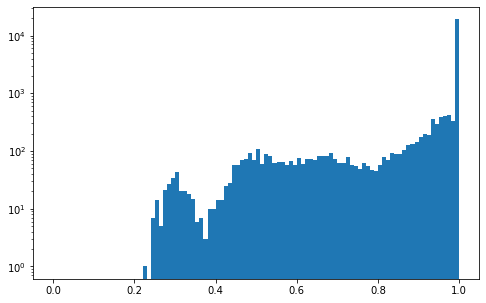

In [36]:
fig,ax = plt.subplots(figsize=(8,5))
plt.hist(df_merged["2_"+name]/df_merged["3_"+name],bins=100,range=(0,1),label=("All Cuts"))
plt.yscale("log")
plt.show()

In [39]:
ding = df_merged["2_"+name]/df_merged["3_"+name]
ding.loc[ding < 0.95].size

4997

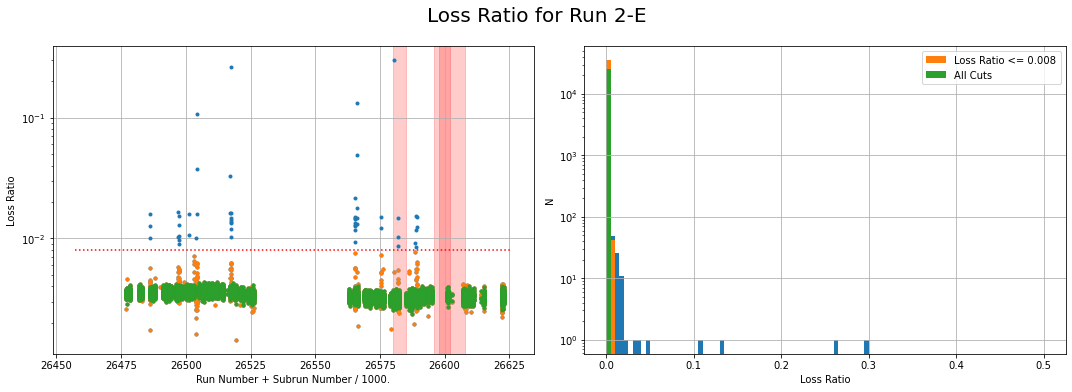

In [30]:
name = 'losses'
df = dfs[name]
df_cut = dfs_cut[name]

#      run  | subrun | lossratio  
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(df[0]+df[1]/1000., df[2], ".")
ax[0].plot(df_cut[0]+df_cut[1]/1000., df_cut[2], ".")
ax[0].plot(df_merged["0_"+name]+df_merged["1_"+name]/1000., df_merged["2_"+name], ".")
ax[0].plot([np.min(df[0])-2, np.max(df[0])+2], [loss_ratio, loss_ratio], ":", color='red')
ax[0].set_yscale("log")

rect_patches = []
for i, (runstart, runend) in enumerate(known_systematic_runs):
    rect_patches.append( matplotlib.patches.Rectangle((runstart,0), runend-runstart+1, 1000, color='red', alpha=0.2) )
    ax[0].add_artist(rect_patches[i])

ax[1].hist(df[2],bins=100,range=(0,.5))
ax[1].hist(df_cut[2],bins=100,range=(0,.5),label=("Loss Ratio <= "+str(loss_ratio)))
ax[1].hist(df_merged["2_"+name],bins=100,range=(0,.5),label=("All Cuts"))
ax[1].legend()
ax[1].set_yscale("log")
plt.suptitle("Loss Ratio for "+dataset, y=1.08, fontsize=20)
ax[0].set_ylabel("Loss Ratio")
ax[0].set_xlabel("Run Number + Subrun Number / 1000.")
ax[1].set_xlabel(r"Loss Ratio")
ax[1].set_ylabel("N")
plt.tight_layout()
for axi in ax:
    axi.grid()
plt.savefig("./images/DQC_Images_"+dataset+"_LossRatio_allCuts.png", bbox_inches='tight')

plt.show()